In [1]:
#필요한 패키지 임포트

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#지수표현식사용X/
pd.options.display.float_format = '{:.1f}'.format 

In [2]:
# 시각화 관련 추가 패키지 임포트

# 글꼴 관련 임포트
from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttf')
path='C:\\Windows\\Fonts\\gulim.ttc'
fontname = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=fontname)

#plot 저장 코드
#plt.savefig('savefig_pad_inches.png')

#seabron palette 시본 팔레트 다양한 색깔 참조
#https://hleecaster.com/python-seaborn-color/

In [3]:
#파일 불러오기

files = pd.read_csv('기업정보_공모전.txt',encoding='CP949',delimiter = '|')
company_info=files.copy()

In [4]:
company_info.sort_values(by='총매출액_천원')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,업력구간,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수
1454617,20201231,경기,성남시중원구,상대원동,외감,M,M71,"전문, 과학 및 기술 서비스업",전문 서비스업,소기업,5년이상 10년미만,남,50대,2,-37547960.0,-18773980.0,nan,nan
658222,20191231,경기,광주시,쌍령동,외감,L,L68,부동산업,부동산업,판단제외,2년이상 5년미만,남,50대,1,-31160484.0,-31160484.0,3.0,3.0
1704616,20201231,서울,강남구,논현동,외감,K,K64,금융 및 보험업,금융업,소기업,5년이상 10년미만,녀,70대,1,-25587505.0,-25587505.0,5.0,5.0
124872,20181231,경기,성남시중원구,상대원동,외감,M,M71,"전문, 과학 및 기술 서비스업",전문 서비스업,소기업,2년이상 5년미만,남,50대,1,-23246242.0,-23246242.0,nan,nan
645511,20191231,강원,춘천시,근화동,외감,L,L68,부동산업,부동산업,중기업,10년이상 20년미만,남,60대,1,-20879239.0,-20879239.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035653,20201231,충북,청주시흥덕구,휴암동,일반법인,S,S96,"협회 및 단체, 수리 및 기타 개인 서비스업",기타 개인 서비스업,소기업,5년이상 10년미만,남,60대,1,nan,nan,nan,nan
2035656,20201231,충북,청주시흥덕구,휴암동,일반법인,F,F42,건설업,전문직별 공사업,소기업,2년이상 5년미만,녀,60대,1,nan,nan,6.0,6.0
2035657,20201231,충북,청주시흥덕구,휴암동,일반법인,F,F42,건설업,전문직별 공사업,소기업,5년이상 10년미만,녀,50대,2,nan,nan,nan,nan
2035658,20201231,충북,청주시흥덕구,휴암동,일반법인,G,G46,도매 및 소매업,도매 및 상품 중개업,소기업,5년이상 10년미만,녀,20대,1,nan,nan,nan,nan


In [5]:
#결측치 확인

company_info.isnull().sum()

기준연월              0
시도                0
시군구           11673
법정동               0
기업공개              0
업종대분류코드        1521
업종중분류코드        1521
업종대분류명         1521
업종중분류명         1521
기업규모              0
업력구간              0
대표자성별             0
대표자연령구간           0
기업수               0
총매출액_천원     1285424
평균매출액_천원    1285424
총종업원수       1238232
평균종업원수      1238232
dtype: int64

In [6]:
company_info['업종중분류명'].value_counts()

도매 및 상품 중개업                              249176
전문직별 공사업                                 149109
부동산업                                     148754
종합 건설업                                    96238
농업                                        84225
                                          ...  
석탄, 원유 및 천연가스 광업                            182
담배 제조업                                       99
수도업                                          83
가구 내 고용활동                                    14
달리 분류되지 않은 자가소비를 위한 가구의 재화 및 서비스 생산활동         9
Name: 업종중분류명, Length: 77, dtype: int64

In [7]:
company_info['업종중분류코드'].value_counts()

G46    249176
F42    149109
L68    148754
F41     96238
A01     84225
        ...  
B05       182
C12        99
E36        83
T97        14
T98         9
Name: 업종중분류코드, Length: 77, dtype: int64

In [8]:
#DATETIME 변형

company_info['datetime'] =company_info['기준연월'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))
# DataFrame의 index 변형하기
company_info.set_index('datetime', inplace=True) 
# year 컬럼 생성
company_info['year']=company_info.index.year
company_info.reset_index()

,datetime,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,업력구간,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year
0,2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,소기업,2년이상 5년미만,남,50대,1,657422.0,657422.0,11.0,11.0,2018
1,2018-12-31,20181231,강원,강릉시,교동,외감,L,L68,부동산업,부동산업,소기업,2년이상 5년미만,남,60대,1,nan,nan,10.0,10.0,2018
2,2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,소기업,2년이상 5년미만,녀,50대,1,1109091.0,1109091.0,10.0,10.0,2018
3,2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,중기업,20년이상 30년미만,남,50대,1,21313582.0,21313582.0,28.0,28.0,2018
4,2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,중기업,1년미만,남,50대,1,964599.0,964599.0,nan,nan,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035656,2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,F,F42,건설업,전문직별 공사업,소기업,2년이상 5년미만,녀,60대,1,nan,nan,6.0,6.0,2020
2035657,2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,F,F42,건설업,전문직별 공사업,소기업,5년이상 10년미만,녀,50대,2,nan,nan,nan,nan,2020
2035658,2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,G,G46,도매 및 소매업,도매 및 상품 중개업,소기업,5년이상 10년미만,녀,20대,1,nan,nan,nan,nan,2020
2035659,2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,M,M72,"전문, 과학 및 기술 서비스업","건축기술, 엔지니어링 및 기타 과학기술 서비스업",소기업,10년이상 20년미만,녀,50대,1,nan,nan,nan,nan,2020


In [9]:
#연령구간 카테고리 확인
np.unique(company_info['대표자연령구간'])

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '정보없음'], dtype=object)

In [10]:
company_info['대표자연령구간'].value_counts()

50대     660453
40대     494024
60대     431835
30대     212747
70대     123303
20대      50573
정보없음     29324
80대      28903
90대       4008
10대        491
Name: 대표자연령구간, dtype: int64

In [11]:
company_info_age = {'10대':10, '20대':20, '30대':30, '40대':40, '50대':50, '60대':60, '70대':70, '80대':80, '90대':90,'정보없음':np.NaN}
company_info['연령대정수'] = company_info['대표자연령구간'].map(company_info_age)
company_info.head()

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,업력구간,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수
datetime,,,,,,,,,,,,,,,,,,,,
2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,소기업,2년이상 5년미만,남,50대,1,657422.0,657422.0,11.0,11.0,2018,50.0
2018-12-31,20181231,강원,강릉시,교동,외감,L,L68,부동산업,부동산업,소기업,2년이상 5년미만,남,60대,1,nan,nan,10.0,10.0,2018,60.0
2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,소기업,2년이상 5년미만,녀,50대,1,1109091.0,1109091.0,10.0,10.0,2018,50.0
2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,중기업,20년이상 30년미만,남,50대,1,21313582.0,21313582.0,28.0,28.0,2018,50.0
2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,중기업,1년미만,남,50대,1,964599.0,964599.0,nan,nan,2018,50.0


In [12]:
# 매출액 백단 단위 추가

company_info['총매출액_백만']=company_info['총매출액_천원']*0.001
company_info.head()

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,소기업,...,남,50대,1,657422.0,657422.0,11.0,11.0,2018,50.0,657.4
2018-12-31,20181231,강원,강릉시,교동,외감,L,L68,부동산업,부동산업,소기업,...,남,60대,1,nan,nan,10.0,10.0,2018,60.0,nan
2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,소기업,...,녀,50대,1,1109091.0,1109091.0,10.0,10.0,2018,50.0,1109.1
2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,중기업,...,남,50대,1,21313582.0,21313582.0,28.0,28.0,2018,50.0,21313.6
2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,중기업,...,남,50대,1,964599.0,964599.0,nan,nan,2018,50.0,964.6


In [13]:
#20~40대 각 연령 추출

기업정보_20대=company_info.query('대표자연령구간=="20대"')
기업정보_30대=company_info.query('대표자연령구간=="30대"')
기업정보_40대=company_info.query('대표자연령구간=="40대"')
기업정보_50대=company_info.query('대표자연령구간=="50대"')

# 지역 별 20대-30대와 40-50대 기업규모 비교 
#### 추가) 지역 별 기업분포 (연령구분x)

In [14]:
#기업규모 카테고리 확인
np.unique(company_info['기업규모'])

array(['대기업', '미분류', '소기업', '중견기업', '중기업', '판단제외'], dtype=object)

In [15]:
company_info.query('기업규모=="미분류"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A01,"농업, 임업 및 어업",농업,미분류,...,남,40대,1,nan,nan,nan,nan,2018,40.0,nan
2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A01,"농업, 임업 및 어업",농업,미분류,...,남,50대,1,nan,nan,nan,nan,2018,50.0,nan
2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A01,"농업, 임업 및 어업",농업,미분류,...,남,60대,1,nan,nan,nan,nan,2018,60.0,nan
2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A02,"농업, 임업 및 어업",임업,미분류,...,남,50대,2,nan,nan,nan,nan,2018,50.0,nan
2018-12-31,20181231,강원,강릉시,교동,일반법인,B,B07,광업,비금속광물 광업; 연료용 제외,미분류,...,남,40대,1,nan,nan,nan,nan,2018,40.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,L,L68,부동산업,부동산업,미분류,...,남,50대,1,nan,nan,nan,nan,2020,50.0,nan
2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,L,L68,부동산업,부동산업,미분류,...,남,60대,1,nan,nan,nan,nan,2020,60.0,nan
2020-12-31,20201231,충북,청주시흥덕구,휴암동,일반법인,R,R91,"예술, 스포츠 및 여가관련 서비스업",스포츠 및 오락관련 서비스업,미분류,...,남,60대,1,nan,nan,nan,nan,2020,60.0,nan


In [16]:
company_info.query('기업규모=="판단제외"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-31,20181231,강원,강릉시,사천면,일반법인,C,C10,제조업,식료품 제조업,판단제외,...,남,70대,1,nan,nan,nan,nan,2018,70.0,nan
2018-12-31,20181231,강원,강릉시,송정동,일반법인,K,K64,금융 및 보험업,금융업,판단제외,...,남,60대,1,962633.0,962633.0,4.0,4.0,2018,60.0,962.6
2018-12-31,20181231,강원,강릉시,옥천동,일반법인,A,A02,"농업, 임업 및 어업",임업,판단제외,...,남,50대,1,5280080.0,5280080.0,14.0,14.0,2018,50.0,5280.1
2018-12-31,20181231,강원,강릉시,옥천동,일반법인,Q,Q86,보건업 및 사회복지 서비스업,보건업,판단제외,...,남,40대,1,6429205.0,6429205.0,nan,nan,2018,40.0,6429.2
2018-12-31,20181231,강원,강릉시,옥천동,일반법인,S,S94,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,판단제외,...,남,60대,1,nan,nan,nan,nan,2018,60.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,20201231,충북,청주시흥덕구,오송읍,일반법인,S,S94,"협회 및 단체, 수리 및 기타 개인 서비스업",협회 및 단체,판단제외,...,녀,60대,1,nan,nan,nan,nan,2020,60.0,nan
2020-12-31,20201231,충북,청주시흥덕구,옥산면,일반법인,Q,Q87,보건업 및 사회복지 서비스업,사회복지 서비스업,판단제외,...,남,50대,1,nan,nan,nan,nan,2020,50.0,nan
2020-12-31,20201231,충북,청주시흥덕구,운천동,일반법인,P,P85,교육 서비스업,교육 서비스업,판단제외,...,남,40대,1,nan,nan,nan,nan,2020,40.0,nan


In [17]:
#20대30대 추출(매출액 null값 존재)
company_size_youth=pd.concat([기업정보_20대,기업정보_30대],axis=0)
#print(company_size_youth.head())

#30대40대 추출(매출액 null값 존재)
company_size_middle=pd.concat([기업정보_40대,기업정보_50대],axis=0)

# 20대30대 추출(매출액 null값 존재)데이터에서 기업규모 '미분류','판단제외' 제거
temp2030=~((company_size_youth['기업규모']=='미분류')|(company_size_youth['기업규모']=='판단제외'))
company_size_youth=company_size_youth[temp2030]

# 40대50대 추출(매출액 null값 존재)데이터에서 기업규모 '미분류','판단제외' 제거
temp4050=~((company_size_middle['기업규모']=='미분류')|(company_size_middle['기업규모']=='판단제외'))
company_size_middle=company_size_middle[temp4050]

In [18]:
# 기업규모 판단제외 제거되었는지 검증
company_size_youth.query('기업규모=="판단제외"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,


In [19]:
# 기업규모 미분류 제거되었는지 검증
company_size_middle.query('기업규모=="미분류"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,


In [20]:
# 시도 별 20~30대 기업규모 분포(18년~20)
company_size_youth_local=company_size_youth.groupby(['시도','기업규모'])['기업규모'].count()
#company_size_youth_local=pd.DataFrame(company_size_youth_local)
company_size_youth_local.columns=['기업수']
company_size_youth_local

시도  기업규모
강원  소기업      3789
    중견기업       10
    중기업       158
경기  대기업        21
    소기업     39499
    중견기업       74
    중기업      2786
경남  소기업      7003
    중견기업        9
    중기업       424
경북  대기업         3
    소기업      6414
    중기업       326
광주  소기업      4854
    중견기업       10
    중기업       318
대구  소기업      5035
    중견기업       13
    중기업       410
대전  소기업      3990
    중견기업        6
    중기업       216
부산  대기업         7
    소기업      8197
    중견기업        7
    중기업       754
서울  대기업       105
    소기업     36132
    중견기업      173
    중기업      4079
세종  소기업       925
    중기업        51
울산  소기업      2131
    중견기업        3
    중기업       145
인천  소기업      6973
    중견기업       18
    중기업       586
전남  대기업         3
    소기업      5673
    중견기업        6
    중기업       272
전북  대기업         1
    소기업      5510
    중견기업        8
    중기업       229
제주  소기업      2479
    중견기업        9
    중기업       145
충남  소기업      6211
    중견기업        4
    중기업       321
충북  대기업         1
    소기업      4672
    중견기업       10
 

In [21]:
# 시도 별 40~50대 기업규모 분포(18년~20)
company_size_middle_local=company_size_middle.groupby(['시도','기업규모'])['기업규모'].count()
#company_size_middle_local=pd.DataFrame(company_size_middle_local)
company_size_middle_local.columns=['기업 수']
company_size_middle_local

시도  기업규모
강원  대기업        84
    소기업     20100
    중견기업      124
    중기업      1652
경기  대기업       714
            ...  
충남  중기업      3758
충북  대기업        78
    소기업     24748
    중견기업      295
    중기업      3140
Name: 기업규모, Length: 68, dtype: int64

In [22]:
company_size_youth_middle_local=pd.concat([company_size_youth_local,company_size_middle_local],axis=1)
company_size_youth_middle_local

기업규모   기업규모
시도 기업규모              
강원 대기업     nan     84
   소기업  3789.0  20100
   중견기업   10.0    124
   중기업   158.0   1652
경기 대기업    21.0    714
...        ...    ...
충남 중기업   321.0   3758
충북 대기업     1.0     78
   소기업  4672.0  24748
   중견기업   10.0    295
   중기업   290.0   3140

[68 rows x 2 columns]

In [23]:
# nan값 0으로 채워주기
company_size_youth_middle_local=company_size_youth_middle_local['기업규모'].fillna(0)

In [24]:
#컬럼명 변경
company_size_youth_middle_local.columns=['청년층 기업 수', '중장년층 기업 수']

In [25]:
#시도 별 청년층&중장년층 기업규모 기업 수 
company_size_youth_middle_local

청년층 기업 수  중장년층 기업 수
시도 기업규모                     
강원 대기업        0.0         84
   소기업     3789.0      20100
   중견기업      10.0        124
   중기업      158.0       1652
경기 대기업       21.0        714
...           ...        ...
충남 중기업      321.0       3758
충북 대기업        1.0         78
   소기업     4672.0      24748
   중견기업      10.0        295
   중기업      290.0       3140

[68 rows x 2 columns]

In [26]:
sido=np.unique(company_info['시도'])
sido

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [27]:
#20~30대 & 40~50대 지역별 기업규모 기업수 확인

size_youth_middle_gangwon=company_size_youth_middle_local.query('시도=="강원"')
size_youth_middle_gyeonggi=company_size_youth_middle_local.query('시도=="경기"')
size_youth_middle_gyeongnam=company_size_youth_middle_local.query('시도=="경남"')
size_youth_middle_gyeongbuk=company_size_youth_middle_local.query('시도=="경북"')
size_youth_middle_gwangju=company_size_youth_middle_local.query('시도=="광주"')
size_youth_middle_daegu=company_size_youth_middle_local.query('시도=="대구"')
size_youth_middle_daejeon=company_size_youth_middle_local.query('시도=="대전"')
size_youth_middle_busan=company_size_youth_middle_local.query('시도=="부산"')
size_youth_middle_seoul=company_size_youth_middle_local.query('시도=="서울"')
size_youth_middle_sejong=company_size_youth_middle_local.query('시도=="세종"')
size_youth_middle_ulsan=company_size_youth_middle_local.query('시도=="울산"')
size_youth_middle_incheon_=company_size_youth_middle_local.query('시도=="인천"')
size_youth_middle_jellanam=company_size_youth_middle_local.query('시도=="전남"')
size_youth_middle_jeollabuk=company_size_youth_middle_local.query('시도=="전북"')
size_youth_middle_jeju=company_size_youth_middle_local.query('시도=="제주"')
size_youth_middle_chungnam=company_size_youth_middle_local.query('시도=="충남"')
size_youth_middle_chungbuk=company_size_youth_middle_local.query('시도=="충북"')

In [28]:
size_youth_middle_gangwon

청년층 기업 수  중장년층 기업 수
시도 기업규모                     
강원 대기업        0.0         84
   소기업     3789.0      20100
   중견기업      10.0        124
   중기업      158.0       1652

In [29]:
size_youth_middle_seoul

청년층 기업 수  중장년층 기업 수
시도 기업규모                     
서울 대기업      105.0       1780
   소기업    36132.0     128871
   중견기업     173.0       3451
   중기업     4079.0      27264

In [30]:
size_youth_middle_gyeonggi

청년층 기업 수  중장년층 기업 수
시도 기업규모                     
경기 대기업       21.0        714
   소기업    39499.0     175924
   중견기업      74.0       1986
   중기업     2786.0      26388

# 20-30대 & 40-50대 지역별 기업규모 기업수 시각화

In [129]:
#size_youth_middle_seoul.to_csv('서울_청년_중장년층_기업규모.csv',encoding='utf-8-sig')

## 추가 지역 별 기업규모(전연령)

In [32]:
## 추가 지역 별 기업규모 분포(전연령)

#기업일반데이터 복사 
company_size=company_info.copy()

#기업규모에서 '미분류', '판단제외'제거
temps=~((company_size['기업규모']=='미분류')|(company_size['기업규모']=='판단제외'))
company_size=company_size[temps]

In [33]:
#삭제되었는지 검증
company_size.query('기업규모=="미분류"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,


In [34]:
company_size.query('기업규모=="판단제외"')

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,


In [35]:
#지역 별 기업규모(전연령)

company_size=company_size.groupby(['시도','기업규모'])['기업규모'].count()
company_size=pd.DataFrame(company_size)
company_size

기업규모
시도 기업규모       
강원 대기업      96
   소기업   33020
   중견기업    194
   중기업    2956
경기 대기업     929
...        ...
충남 중기업    6576
충북 대기업     101
   소기업   39848
   중견기업    501
   중기업    5446

[68 rows x 1 columns]

# 20~30대 시도 별 매출액 평균 (3개년 평균)
## 매출액 -값 : 계산에 포함하되, 코멘트 필수

In [36]:
# 매출액 null값 행 삭제 

매출액_20대=기업정보_20대.dropna(subset=['총매출액_천원','총매출액_백만'])
매출액_30대=기업정보_30대.dropna(subset=['총매출액_천원','총매출액_백만'])
매출액_40대=기업정보_40대.dropna(subset=['총매출액_천원','총매출액_백만'])
매출액_50대=기업정보_50대.dropna(subset=['총매출액_천원','총매출액_백만'])

# 20대 30대 추출(매출액 null값 없음)
company_sales_youth=pd.concat([매출액_20대,매출액_30대],axis=0)
company_sales_youth.head()

# 40대 50대 추출(매출액 null값 없음)
company_sales_middle=pd.concat([매출액_40대,매출액_50대],axis=0)
company_sales_middle.head()

,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,기업규모,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
datetime,,,,,,,,,,,,,,,,,,,,,
2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A01,"농업, 임업 및 어업",농업,소기업,...,남,40대,1,6700.0,6700.0,nan,nan,2018,40.0,6.7
2018-12-31,20181231,강원,강릉시,교동,일반법인,C,C23,제조업,비금속 광물제품 제조업,소기업,...,남,40대,1,316225.0,316225.0,nan,nan,2018,40.0,316.2
2018-12-31,20181231,강원,강릉시,교동,일반법인,F,F41,건설업,종합 건설업,소기업,...,남,40대,2,188868.0,188868.0,10.0,5.0,2018,40.0,188.9
2018-12-31,20181231,강원,강릉시,교동,일반법인,F,F41,건설업,종합 건설업,소기업,...,남,40대,1,6286594.0,6286594.0,22.0,22.0,2018,40.0,6286.6
2018-12-31,20181231,강원,강릉시,교동,일반법인,F,F41,건설업,종합 건설업,소기업,...,남,40대,1,1067014.0,1067014.0,4.0,4.0,2018,40.0,1067.0


In [37]:
company_sales_youth['업종중분류명']

datetime
2018-12-31                       임업
2018-12-31                   종합 건설업
2018-12-31                 전문직별 공사업
2018-12-31                   종합 건설업
2018-12-31                 전문직별 공사업
                      ...          
2020-12-31    전기, 가스, 증기 및 공기조절 공급업
2020-12-31                 전문직별 공사업
2020-12-31              도매 및 상품 중개업
2020-12-31           기타 기계 및 장비 제조업
2020-12-31                기타 제품 제조업
Name: 업종중분류명, Length: 85663, dtype: object

In [38]:
# 기업수 카운팅
company_count_youth=company_sales_youth.groupby(['시도'])['총매출액_백만'].count()
company_count_youth=pd.DataFrame(company_count_youth)
company_count_youth.columns=['기업수']
company_count_youth

,기업수
시도,
강원,2156
경기,22022
경남,4203
경북,3618
광주,2615
대구,2827
대전,2303
부산,4919
서울,21300


In [39]:
# 20~30대 시도 별 총 매출액 평균
company_sales_youth_local=company_sales_youth.groupby(['시도'])['총매출액_백만'].mean()
company_sales_youth_local=pd.DataFrame(company_sales_youth_local)
company_sales_youth_local

,총매출액_백만
시도,
강원,2339.3
경기,3538.6
경남,4432.4
경북,2569.7
광주,3308.4
대구,3523.0
대전,2151.7
부산,4158.5
서울,6661.0


In [40]:
# 20~30대 기업수와 시도 별 총 매출액 평균 합치기
company_sales_2030 = pd.concat([company_count_youth,company_sales_youth_local],axis=1,join='inner') 
company_sales_2030

,기업수,총매출액_백만
시도,,
강원,2156,2339.3
경기,22022,3538.6
경남,4203,4432.4
경북,3618,2569.7
광주,2615,3308.4
대구,2827,3523.0
대전,2303,2151.7
부산,4919,4158.5
서울,21300,6661.0


In [41]:
# 20~30대 시도 별 총 매출액 평균 순위
company_sales_2030.sort_values(by='총매출액_백만',ascending=False)

,기업수,총매출액_백만
시도,,
서울,21300,6661.0
경남,4203,4432.4
부산,4919,4158.5
인천,3967,3987.9
경기,22022,3538.6
대구,2827,3523.0
울산,1148,3484.2
광주,2615,3308.4
충남,3468,2827.9


In [42]:
# 시각화 하기 위한 index 재정렬
company_sales_2030_df=company_sales_2030.reset_index()
company_sales_2030_df

,시도,기업수,총매출액_백만
0,강원,2156,2339.3
1,경기,22022,3538.6
2,경남,4203,4432.4
3,경북,3618,2569.7
4,광주,2615,3308.4
5,대구,2827,3523.0
6,대전,2303,2151.7
7,부산,4919,4158.5
8,서울,21300,6661.0
9,세종,536,1539.3


## 20~30대 전국 시도 별 총 매출액 평균 순위 시각화 (main)

In [43]:
from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttf')
path='C:\\Windows\\Fonts\\gulim.ttc'
fontname = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=fontname)

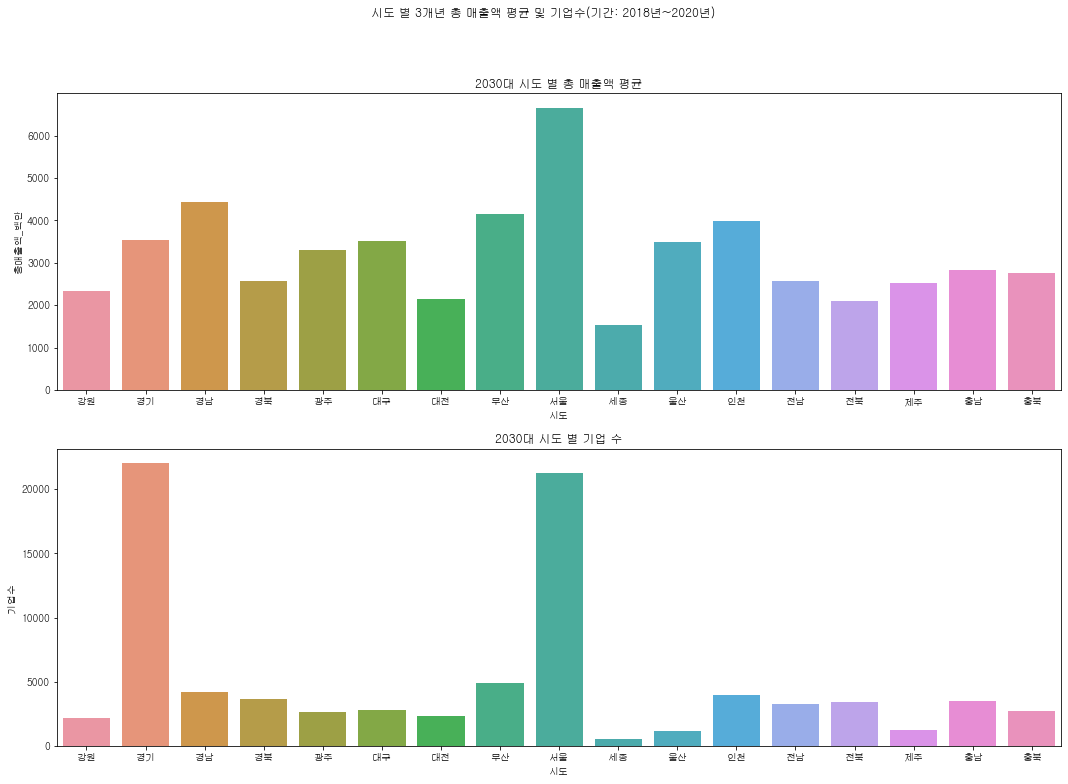

In [44]:
f, ax = plt.subplots(2, figsize=(18,12))

sns.barplot(x = "시도", y = "총매출액_백만",data = company_sales_2030_df, ax = ax[0])
sns.barplot(x = "시도", y = "기업수" , data = company_sales_2030_df, ax = ax[1])
plt.xticks(rotation=360)
ax[0].set_title("2030대 시도 별 총 매출액 평균")
ax[1].set_title("2030대 시도 별 기업 수")
plt.suptitle("시도 별 3개년 총 매출액 평균 및 기업수(기간: 2018년~2020년)")
plt.show()

In [137]:
#전국 기업 수 대비 총 매출액 평균 year 별 추출

company_sales_youth_year=company_sales_youth.reset_index()
company_sales_youth_year=company_sales_youth.groupby(['시도','year'])['총매출액_백만'].mean()
company_sales_youth_year

,시도,year,총매출액_백만
0,강원,2018,2604.2
1,강원,2019,2422.9
2,강원,2020,1900.1
3,경기,2018,3426.2
4,경기,2019,3402.9
5,경기,2020,3873.8
6,경남,2018,4176.9
7,경남,2019,4496.8
8,경남,2020,4708.6
9,경북,2018,2613.1


In [132]:
#company_sales_youth_year.to_csv('전국_총_매출액 평균_(18s,19s,20s).csv',encoding='utf-8-sig')

# 2020년 전국 시도 평균 총 매출액 구하기 

In [46]:
#2020년 데이터 추출

company_sales_youth_2020=company_sales_youth_year.reset_index()
#print(company_sales_youth_2020)
company_sales_youth_2020=company_sales_youth_2020.query('year=="2020"')
company_sales_youth_2020

,시도,year,총매출액_백만
2,강원,2020,1900.1
5,경기,2020,3873.8
8,경남,2020,4708.6
11,경북,2020,2572.3
14,광주,2020,4343.9
17,대구,2020,3357.3
20,대전,2020,1919.3
23,부산,2020,4429.7
26,서울,2020,5223.2
29,세종,2020,1480.3


In [131]:
#company_sales_youth_2020.to_csv('2020년_2030_전국총매출액평균.csv',encoding='utf-8-sig')

In [47]:
# 바차트에서 시도 글자 없애기 위한 리스트 형태 준비
한국시도= ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산','인천', '전남', '전북', '제주', '충남', '충북']
한국시도

['강원',
 '경기',
 '경남',
 '경북',
 '광주',
 '대구',
 '대전',
 '부산',
 '서울',
 '세종',
 '울산',
 '인천',
 '전남',
 '전북',
 '제주',
 '충남',
 '충북']

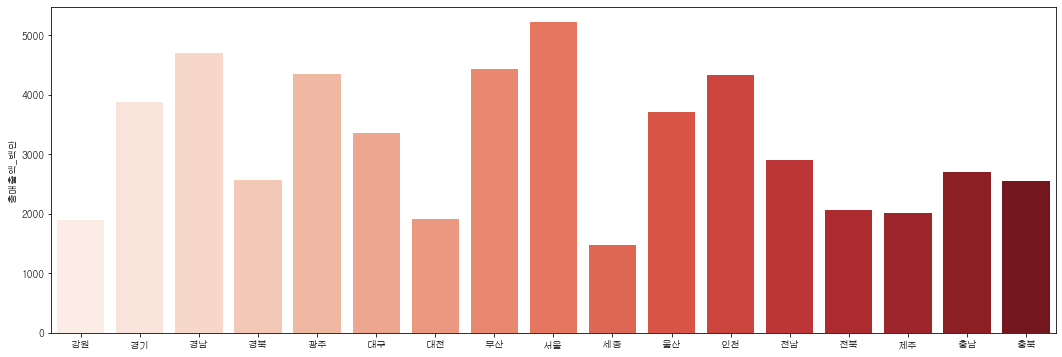

In [48]:
#20~30대 시도 별 총 매출액 평균 순위 시각화 (main) 

f, ax = plt.subplots(1, figsize=(18,6))

sns.barplot(x =한국시도, y ="총매출액_백만",data = company_sales_youth_2020,ax= ax,palette='Reds')
plt.xticks(rotation=360)
plt.grid(False) # 격자무늬 배경 제거
plt.show()

## 추가 시각화) 20-30대 &40-50대 기업규모에 따른 총매출액 평균(한 회사를 점으로 표현)

In [49]:
# 기업일반 데이터에서 매출액 없는 행 삭제

company_info_salse=company_info.copy()
company_info_salse=company_info_salse.reset_index()
company_info_salse=company_info_salse.dropna(subset=['총매출액_천원','총매출액_백만'])
company_info_salse.head()

,datetime,기준연월,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류명,업종중분류명,...,대표자성별,대표자연령구간,기업수,총매출액_천원,평균매출액_천원,총종업원수,평균종업원수,year,연령대정수,총매출액_백만
0,2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,...,남,50대,1,657422.0,657422.0,11.0,11.0,2018,50.0,657.4
2,2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,...,녀,50대,1,1109091.0,1109091.0,10.0,10.0,2018,50.0,1109.1
3,2018-12-31,20181231,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,...,남,50대,1,21313582.0,21313582.0,28.0,28.0,2018,50.0,21313.6
4,2018-12-31,20181231,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,...,남,50대,1,964599.0,964599.0,nan,nan,2018,50.0,964.6
88,2018-12-31,20181231,강원,강릉시,교동,일반법인,A,A01,"농업, 임업 및 어업",농업,...,남,40대,1,6700.0,6700.0,nan,nan,2018,40.0,6.7


In [50]:
# 필요한 행만 추출

company_info_salse=company_info_salse[['시도','대표자연령구간','기업규모','총매출액_백만','year']]
company_info_salse.head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
0,강원,50대,소기업,657.4,2018
2,강원,50대,소기업,1109.1,2018
3,강원,50대,중기업,21313.6,2018
4,강원,50대,중기업,964.6,2018
88,강원,40대,소기업,6.7,2018


In [51]:
# 대표자 연령구간 청넌층/중장년층으로 치환.

company_info_salse = company_info_salse.replace("20대", "청년층")
company_info_salse = company_info_salse.replace("30대", "청년층")
company_info_salse = company_info_salse.replace("50대", "중장년층")
company_info_salse = company_info_salse.replace("40대", "중장년층")
company_info_salse.head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
0,강원,중장년층,소기업,657.4,2018
2,강원,중장년층,소기업,1109.1,2018
3,강원,중장년층,중기업,21313.6,2018
4,강원,중장년층,중기업,964.6,2018
88,강원,중장년층,소기업,6.7,2018


In [52]:
#청년층 잘 치환되었는지 확인

company_info_salse.query('대표자연령구간=="20대"').head()

#중장년층 잘 치환되었는지 확인
#company_info_salse.query('대표자연령구간=="40대"').head()

,시도,대표자연령구간,기업규모,총매출액_백만,year


In [53]:
# 청년층&중장년층 외 제거 

temps_20304050 =((company_info_salse['대표자연령구간']=='청년층') | (company_info_salse['대표자연령구간']=='중장년층'))
company_info_salse=company_info_salse[temps_20304050]

In [54]:
# 청년층&중장년층 외 제거되었는지  검증 확인

#company_info_salse.query('시도=="서울"')
company_info_salse.query('대표자연령구간=="10대"')

,시도,대표자연령구간,기업규모,총매출액_백만,year


In [55]:
# 기업규모 '미분류','판단제외' 제거
temp_sizes=~((company_info_salse['기업규모']=='미분류')|(company_info_salse['기업규모']=='판단제외'))
company_info_salse=company_info_salse[temp_sizes]
company_info_salse.head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
0,강원,중장년층,소기업,657.4,2018
2,강원,중장년층,소기업,1109.1,2018
3,강원,중장년층,중기업,21313.6,2018
4,강원,중장년층,중기업,964.6,2018
88,강원,중장년층,소기업,6.7,2018


In [56]:
# 기업규모 '미분류','판단제외' 제거되었는지 검증
company_info_salse.query('기업규모=="판단제외"')

,시도,대표자연령구간,기업규모,총매출액_백만,year


In [57]:
# 년도 별 나누기

company_info_salse_2018=company_info_salse.query('year == "2018"')
#print(company_info_salse_2018.head())

company_info_salse_2019=company_info_salse.query('year == "2019"')
#print(company_info_salse_2019.head())

company_info_salse_2020=company_info_salse.query('year == "2020"')
company_info_salse_2020.head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
1306193,강원,중장년층,소기업,930.6,2020
1306195,강원,중장년층,소기업,49.1,2020
1306197,강원,중장년층,중기업,2790.7,2020
1306198,강원,중장년층,중기업,3.0,2020
1306319,강원,청년층,소기업,327.1,2020


In [58]:
# 2020년 서울 추출해보기

company_info_salse_2020[company_info_salse_2020['시도']=='서울'].head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
1692016,서울,중장년층,대기업,20721.9,2020
1692018,서울,중장년층,대기업,60989.6,2020
1692020,서울,중장년층,소기업,3936.7,2020
1692021,서울,중장년층,소기업,150.2,2020
1692022,서울,중장년층,중기업,12140.0,2020


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44204 missing from c

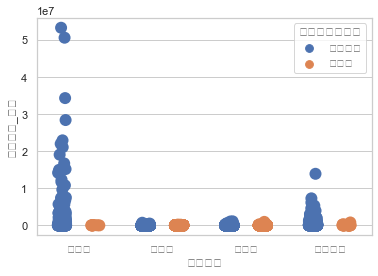

In [59]:
# stripplot 서울 2020년 그려보기
# 다른 옵션 #jitter=True
# 글꼴 에러 뜸

from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttf')
path='C:\\Windows\\Fonts\\gulim.ttc'
fontname = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=fontname)

sns.set(style="whitegrid")

fig, ax = plt.subplots(1,1)
ax = sns.stripplot(x="기업규모", y="총매출액_백만", hue="대표자연령구간",data=company_info_salse_2020[company_info_salse_2020['시도']=='서울'],size=12,ax=ax,dodge=True)
plt.show()

In [60]:
company_info_salse_2020[company_info_salse_2020['시도']=='서울'].head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
1692016,서울,중장년층,대기업,20721.9,2020
1692018,서울,중장년층,대기업,60989.6,2020
1692020,서울,중장년층,소기업,3936.7,2020
1692021,서울,중장년층,소기업,150.2,2020
1692022,서울,중장년층,중기업,12140.0,2020


In [61]:
company_info_salse_2020[company_info_salse_2020['시도']=='강원'].head()

,시도,대표자연령구간,기업규모,총매출액_백만,year
1306193,강원,중장년층,소기업,930.6,2020
1306195,강원,중장년층,소기업,49.1,2020
1306197,강원,중장년층,중기업,2790.7,2020
1306198,강원,중장년층,중기업,3.0,2020
1306319,강원,청년층,소기업,327.1,2020


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from c

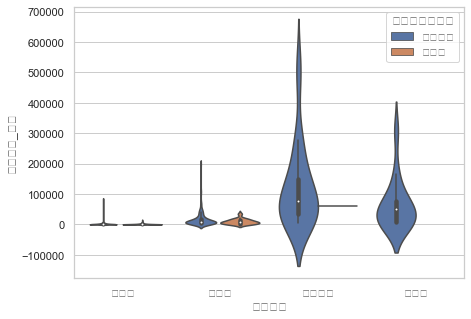

In [62]:
#시각화 시도하였으니 이쁘지 않음...

axs=plt.subplots(figsize=(7,5))
axs=sns.violinplot(x="기업규모", y="총매출액_백만", hue="대표자연령구간",data=company_info_salse_2020[company_info_salse_2020['시도']=='강원'],paltte='Reds')
plt.show()

In [63]:
서울이다=company_info_salse_2020[company_info_salse_2020['시도']=='서울']
서울이다.query('대표자연령구간=="중장년층"').count()

시도         27117
대표자연령구간    27117
기업규모       27117
총매출액_백만    27117
year       27117
dtype: int64

<AxesSubplot:xlabel='기업규모', ylabel='총매출액_백만'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from c

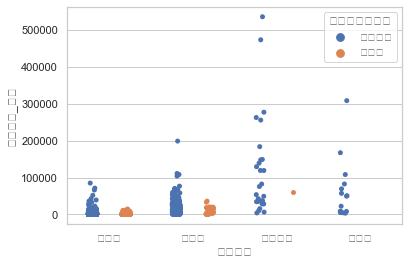

In [64]:
sns.stripplot(x="기업규모", y="총매출액_백만", hue="대표자연령구간",data=company_info_salse_2020[company_info_salse_2020['시도']=='강원'],dodge=True)

#피드백
#매출규모-버블(청년층-작은버블..)
#평행좌표그래프

In [65]:
#서울만 추출(매출액 마이너스 값 확인..)

company_info_salse_2020[company_info_salse_2020['시도']=='서울'].sort_values(by='총매출액_백만')

,시도,대표자연령구간,기업규모,총매출액_백만,year
1799381,서울,중장년층,중견기업,-4451.0,2020
1734762,서울,중장년층,중기업,-2146.3,2020
1769934,서울,중장년층,소기업,-300.0,2020
1788898,서울,중장년층,소기업,-265.9,2020
1753621,서울,중장년층,중기업,-265.2,2020
...,...,...,...,...,...
1722474,서울,중장년층,대기업,22954483.0,2020
1839198,서울,중장년층,대기업,28435323.0,2020
1782132,서울,중장년층,대기업,34362327.0,2020
1782131,서울,중장년층,대기업,50661002.0,2020


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


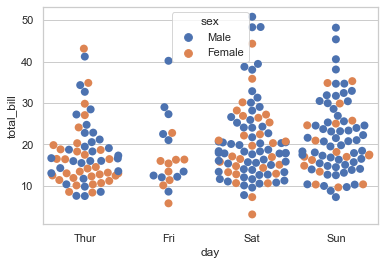

In [66]:
#예시 파일

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
tips=sns.load_dataset("tips")

fig, ax = plt.subplots(1,1)
ax = sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips,size=8,ax=ax)
plt.show()

# 20~30대 시도-업종 별 매출액 평균(3개년)

In [67]:
# 중분류 확인
company_sales_youth['업종중분류명'].value_counts()

도매 및 상품 중개업           14432
전문직별 공사업               7875
출판업                    4044
소매업; 자동차 제외            3866
식료품 제조업                3483
                      ...  
수도업                       9
공공행정, 국방 및 사회보장 행정        6
항공 운송업                    5
보험 및 연금업                  3
석탄, 원유 및 천연가스 광업          1
Name: 업종중분류명, Length: 71, dtype: int64

In [68]:
# 20대~30대 시도-업종 별 매출액 평균(3개년)
company_sales_youth_kind=company_sales_youth.groupby(['시도','업종중분류명'])['총매출액_백만'].mean()
company_sales_youth_kind=pd.DataFrame(company_sales_youth_kind)
company_sales_youth_kind

총매출액_백만
시도 업종중분류명                             
강원 1차 금속 제조업                    4290.0
   가구 제조업                        906.3
   개인 및 소비용품 수리업                2048.6
   건축기술, 엔지니어링 및 기타 과학기술 서비스업    599.5
   고무 및 플라스틱제품 제조업              1809.4
...                                ...
충북 폐기물 수집, 운반, 처리 및 원료 재생업      1614.3
   하수, 폐수 및 분뇨 처리업               555.5
   협회 및 단체                      1773.4
   화학물질 및 화학제품 제조업; 의약품 제외      3206.3
   환경 정화 및 복원업                    67.3

[1030 rows x 1 columns]

In [69]:
sido

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [70]:
#시도 별 20~30대 매출액 평균 상위 업종 탑 10

sales_youth_gangwon=company_sales_youth_kind.query('시도=="강원"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeonggi=company_sales_youth_kind.query('시도=="경기"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongnam=company_sales_youth_kind.query('시도=="경남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongbuk=company_sales_youth_kind.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gwangju=company_sales_youth_kind.query('시도=="광주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daegu=company_sales_youth_kind.query('시도=="대구"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daejeon=company_sales_youth_kind.query('시도=="대전"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_busan=company_sales_youth_kind.query('시도=="부산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_seoul=company_sales_youth_kind.query('시도=="서울"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_sejong=company_sales_youth_kind.query('시도=="세종"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_ulsan =company_sales_youth_kind.query('시도=="울산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_incheon=company_sales_youth_kind.query('시도=="인천"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jellanam=company_sales_youth_kind.query('시도=="전남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeollabuk=company_sales_youth_kind.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeju=company_sales_youth_kind.query('시도=="제주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungnam=company_sales_youth_kind.query('시도=="충남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungbuk=company_sales_youth_kind.query('시도=="충북"').sort_values(by='총매출액_백만',ascending=False)[:10]

# 20~30대 시도-업종 별 매출액 평균(1개년씩)

In [71]:
# 20대~30대 시도-업종 별 매출액 평균(1개년씩)
company_sales_youth_kind_year=company_sales_youth.groupby(['year','시도','업종중분류명'])['총매출액_백만'].mean()
company_sales_youth_kind_year=pd.DataFrame(company_sales_youth_kind_year)
company_sales_youth_kind_year

총매출액_백만
year 시도 업종중분류명                             
2018 강원 1차 금속 제조업                    4596.7
        가구 제조업                        850.6
        개인 및 소비용품 수리업                2492.3
        건축기술, 엔지니어링 및 기타 과학기술 서비스업    409.7
        고무 및 플라스틱제품 제조업              1390.0
...                                     ...
2020 충북 펄프, 종이 및 종이제품 제조업            3393.5
        폐기물 수집, 운반, 처리 및 원료 재생업      1406.4
        하수, 폐수 및 분뇨 처리업               763.3
        협회 및 단체                      1677.1
        화학물질 및 화학제품 제조업; 의약품 제외      2988.2

[2937 rows x 1 columns]

In [72]:
#20대~30대 시도-업종 별 매출액 평균 (년도별로 자세히 보기)
company_sales_youth_kind_18s=company_sales_youth_kind_year.loc[2018].sort_values(by='총매출액_백만',ascending=False)
company_sales_youth_kind_19s=company_sales_youth_kind_year.loc[2019].sort_values(by='총매출액_백만',ascending=False)
company_sales_youth_kind_20s=company_sales_youth_kind_year.loc[2020].sort_values(by='총매출액_백만',ascending=False)
company_sales_youth_kind_20s

,,총매출액_백만
시도,업종중분류명,
서울,"석탄, 원유 및 천연가스 광업",181193.5
부산,"건축기술, 엔지니어링 및 기타 과학기술 서비스업",96802.1
대구,1차 금속 제조업,42151.3
울산,화학물질 및 화학제품 제조업; 의약품 제외,34755.2
경기,"하수, 폐수 및 분뇨 처리업",33632.2
...,...,...
경남,의료용 물질 및 의약품 제조업,19.2
충남,정보서비스업,15.9
서울,어업,13.2


In [73]:
#20대~30대 시도-업종 별 매출액 평균 (시도별로 자세히 보기) ##for 문????
sido=np.unique(company_sales_youth['시도'])
sido

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [74]:
# 2018년 20~30대 시도-업종 별 매출액 평균
sales_youth_gangwon_2018=company_sales_youth_kind_18s.query('시도=="강원"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeonggi_2018=company_sales_youth_kind_18s.query('시도=="경기"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongnam_2018=company_sales_youth_kind_18s.query('시도=="경남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongbuk_2018=company_sales_youth_kind_18s.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gwangju_2018=company_sales_youth_kind_18s.query('시도=="광주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daegu_2018=company_sales_youth_kind_18s.query('시도=="대구"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daejeon_2018=company_sales_youth_kind_18s.query('시도=="대전"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_busan_2018=company_sales_youth_kind_18s.query('시도=="부산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_seoul_2018=company_sales_youth_kind_18s.query('시도=="서울"').sort_values(by='총매출액_백만',ascending=False) #[:10]
sales_youth_sejong_2018=company_sales_youth_kind_18s.query('시도=="세종"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_ulsan_2018=company_sales_youth_kind_18s.query('시도=="울산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_incheon_2018=company_sales_youth_kind_18s.query('시도=="인천"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jellanam_2018=company_sales_youth_kind_18s.query('시도=="전남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeollabuk_2018=company_sales_youth_kind_18s.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeju_2018=company_sales_youth_kind_18s.query('시도=="제주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungnam_2018=company_sales_youth_kind_18s.query('시도=="충남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungbuk_2018=company_sales_youth_kind_18s.query('시도=="충북"').sort_values(by='총매출액_백만',ascending=False)[:10]

In [75]:
# 2019년 20~30대 시도-업종 별 매출액 평균
sales_youth_gangwon_2019=company_sales_youth_kind_19s.query('시도=="강원"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeonggi_2019=company_sales_youth_kind_19s.query('시도=="경기"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongnam_2019=company_sales_youth_kind_19s.query('시도=="경남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongbuk_2019=company_sales_youth_kind_19s.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gwangju_2019=company_sales_youth_kind_19s.query('시도=="광주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daegu_2019=company_sales_youth_kind_19s.query('시도=="대구"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daejeon_2019=company_sales_youth_kind_19s.query('시도=="대전"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_busan_2019=company_sales_youth_kind_19s.query('시도=="부산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_seoul_2019=company_sales_youth_kind_19s.query('시도=="서울"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_sejong_2019=company_sales_youth_kind_19s.query('시도=="세종"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_ulsan_2019=company_sales_youth_kind_19s.query('시도=="울산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_incheon_2019=company_sales_youth_kind_19s.query('시도=="인천"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jellanam_2019=company_sales_youth_kind_19s.query('시도=="전남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeollabuk_2019=company_sales_youth_kind_19s.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeju_2019=company_sales_youth_kind_19s.query('시도=="제주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungnam_2019=company_sales_youth_kind_19s.query('시도=="충남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungbuk_2019=company_sales_youth_kind_19s.query('시도=="충북"').sort_values(by='총매출액_백만',ascending=False)[:10]

In [76]:
# 2020년 20~30대 시도-업종 별 매출액 평균
sales_youth_gangwon_2020=company_sales_youth_kind_20s.query('시도=="강원"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeonggi_2020=company_sales_youth_kind_20s.query('시도=="경기"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongnam_2020=company_sales_youth_kind_20s.query('시도=="경남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gyeongbuk_2020=company_sales_youth_kind_20s.query('시도=="경북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_gwangju_2020=company_sales_youth_kind_20s.query('시도=="광주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daegu_2020=company_sales_youth_kind_20s.query('시도=="대구"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_daejeon_2020=company_sales_youth_kind_20s.query('시도=="대전"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_busan_2020=company_sales_youth_kind_20s.query('시도=="부산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_seoul_2020=company_sales_youth_kind_20s.query('시도=="서울"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_sejong_2020=company_sales_youth_kind_20s.query('시도=="세종"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_ulsan_2020=company_sales_youth_kind_20s.query('시도=="울산"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_incheon_2020=company_sales_youth_kind_20s.query('시도=="인천"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jellanam_2020=company_sales_youth_kind_20s.query('시도=="전남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeollabuk_2020=company_sales_youth_kind_20s.query('시도=="전북"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_jeju_2020=company_sales_youth_kind_20s.query('시도=="제주"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungnam_2020=company_sales_youth_kind_20s.query('시도=="충남"').sort_values(by='총매출액_백만',ascending=False)[:10]
sales_youth_chungbuk_2020=company_sales_youth_kind_20s.query('시도=="충북"').sort_values(by='총매출액_백만',ascending=False)[:10]

#  신설법인 증가율 top 5 (서울시)

    1위 의료용 물질 및 의약품 제조업     1.533333
    2위 기타 운송장비 제조업          1.333333
    3위 고무 및 플라스틱제품 제조업      1.333333
    4위 농업                   1.307692
    5위 펄프, 종이 및 종이제품 제조업    1.200000

In [77]:
#2030 매출액 있는 데이터 가져오기

company_sales_youth_kind_year_reset_index=company_sales_youth_kind_year.reset_index()
company_sales_youth_kind_year_reset_index

,year,시도,업종중분류명,총매출액_백만
0,2018,강원,1차 금속 제조업,4596.7
1,2018,강원,가구 제조업,850.6
2,2018,강원,개인 및 소비용품 수리업,2492.3
3,2018,강원,"건축기술, 엔지니어링 및 기타 과학기술 서비스업",409.7
4,2018,강원,고무 및 플라스틱제품 제조업,1390.0
...,...,...,...,...
2932,2020,충북,"펄프, 종이 및 종이제품 제조업",3393.5
2933,2020,충북,"폐기물 수집, 운반, 처리 및 원료 재생업",1406.4
2934,2020,충북,"하수, 폐수 및 분뇨 처리업",763.3
2935,2020,충북,협회 및 단체,1677.1


In [78]:
# year 시도 업종중분류명으로 총매출액 평균 구하기
new_company_ja=company_sales_youth_kind_year_reset_index.groupby(['year','시도','업종중분류명'])['총매출액_백만'].mean()
new_company_ja=new_company_ja.reset_index()
new_company_ja.head()

,year,시도,업종중분류명,총매출액_백만
0,2018,강원,1차 금속 제조업,4596.7
1,2018,강원,가구 제조업,850.6
2,2018,강원,개인 및 소비용품 수리업,2492.3
3,2018,강원,"건축기술, 엔지니어링 및 기타 과학기술 서비스업",409.7
4,2018,강원,고무 및 플라스틱제품 제조업,1390.0


In [79]:
#서울만 추출

new_company_seoul=new_company_ja.query('시도=="서울"')
new_company_seoul

,year,시도,업종중분류명,총매출액_백만
487,2018,서울,1차 금속 제조업,1529.0
488,2018,서울,가구 제조업,2316.9
489,2018,서울,"가죽, 가방 및 신발 제조업",3962.0
490,2018,서울,개인 및 소비용품 수리업,2041.5
491,2018,서울,"건축기술, 엔지니어링 및 기타 과학기술 서비스업",1496.0
...,...,...,...,...
2512,2020,서울,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",1582.6
2513,2020,서울,"펄프, 종이 및 종이제품 제조업",2175.8
2514,2020,서울,"폐기물 수집, 운반, 처리 및 원료 재생업",2637.0
2515,2020,서울,협회 및 단체,728.1


In [80]:
new_company_seoul.head()

,year,시도,업종중분류명,총매출액_백만
487,2018,서울,1차 금속 제조업,1529.0
488,2018,서울,가구 제조업,2316.9
489,2018,서울,"가죽, 가방 및 신발 제조업",3962.0
490,2018,서울,개인 및 소비용품 수리업,2041.5
491,2018,서울,"건축기술, 엔지니어링 및 기타 과학기술 서비스업",1496.0


In [81]:
# 서울_신설법인 증가율 top 5로 업종 분류

one_new_company_seoul=new_company_seoul[new_company_seoul['업종중분류명']=='의료용 물질 및 의약품 제조업']
two_new_company_seoul=new_company_seoul[new_company_seoul['업종중분류명']=='기타 운송장비 제조업']
three_new_company_seoul=new_company_seoul[new_company_seoul['업종중분류명']=='고무 및 플라스틱제품 제조업']
four_new_company_seoul=new_company_seoul[new_company_seoul['업종중분류명']=='농업']
five_new_company_seoul=new_company_seoul[new_company_seoul['업종중분류명']=='펄프, 종이 및 종이제품 제조업']

In [82]:
#신설법인 증가율 top 5 서울 데이터 프레임 합치기

new_company_seoul_top5=pd.concat([one_new_company_seoul,two_new_company_seoul,three_new_company_seoul,four_new_company_seoul,five_new_company_seoul]
    ,axis=0)

new_company_seoul_top5.head()

,year,시도,업종중분류명,총매출액_백만
529,2018,서울,의료용 물질 및 의약품 제조업,21669.2
1519,2019,서울,의료용 물질 및 의약품 제조업,22406.7
2496,2020,서울,의료용 물질 및 의약품 제조업,18403.1
499,2018,서울,기타 운송장비 제조업,431.3
1490,2019,서울,기타 운송장비 제조업,424.4


In [83]:
# #신설법인 증가율 top 5 서울 2020년 기준

new_company_seoul_top5_20s=new_company_seoul_top5.query('year=="2020"')
new_company_seoul_top5_20s

,year,시도,업종중분류명,총매출액_백만
2496,2020,서울,의료용 물질 및 의약품 제조업,18403.1
2467,2020,서울,기타 운송장비 제조업,650.1
2460,2020,서울,고무 및 플라스틱제품 제조업,12087.4
2470,2020,서울,농업,1305.2
2513,2020,서울,"펄프, 종이 및 종이제품 제조업",2175.8


In [101]:
#new_company_seoul_top5_20s.to_csv('2020년서울_뜨는업종_매출액평균.csv',encoding='utf-8-sig')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47308 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48143 missing from c

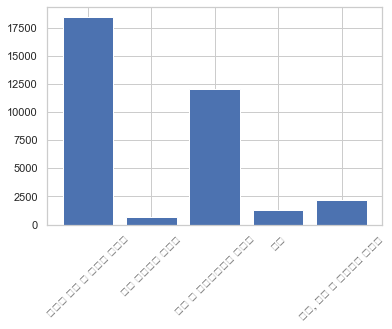

In [84]:
# 서울시 2020년 신설법인 top5 막대그래프 시각화.

plt.xticks(rotation=45)
plt.bar(new_company_seoul_top5_20s['업종중분류명'],new_company_seoul_top5_20s['총매출액_백만'])
plt.xticks(new_company_seoul_top5_20s['업종중분류명'])

plt.show()

In [85]:
#바차트 x축 업종분류명 없애기 위해 리스트 형태로 만들어줌.

서울_탑5 = ['의료용 물질 및 약품 제조업','기타 운송장비 제조업','고무 및 플라스틱제품 제조업','농업', '펄프, 종이 및 종이제품 제조업']

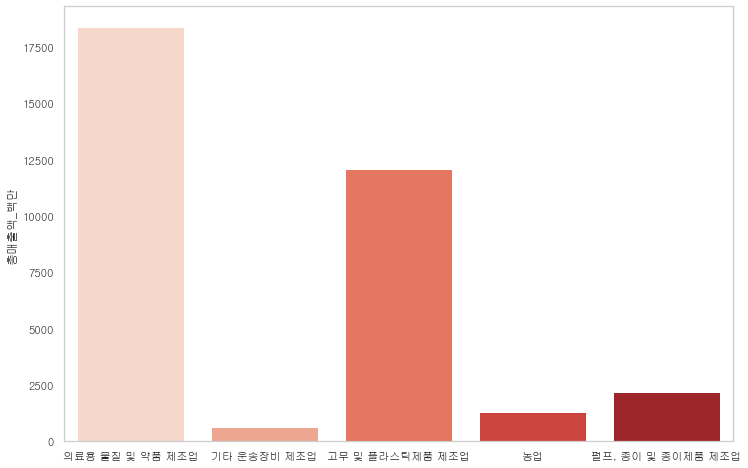

In [87]:
# 서울시 2020년 신설법인 top5 막대그래프 시각화_sns 활용

# 글꼴 관련 임포트
from matplotlib import font_manager, rc
font_list = font_manager.findSystemFonts(fontpaths= None, fontext = 'ttf')
path='C:\\Windows\\Fonts\\gulim.ttc'
fontname = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=fontname)


plt.figure(figsize=(12,8))
sns.barplot(x = 서울_탑5, y = new_company_seoul_top5_20s['총매출액_백만'],
            data=new_company_seoul_top5_20s,palette='Reds')  

#plt.xticks(rotation=360,fontsize=13)
plt.grid(False) # 격자무늬 배경 제거


#plt.savefig('./그래프사진/서울시_top5.png')

#  신설법인 증가율 top 5 (서울시)

    1위 의료용 물질 및 의약품 제조업     1.533333
    2위 기타 운송장비 제조업          1.333333
    3위 고무 및 플라스틱제품 제조업      1.333333
    4위 농업                   1.307692
    5위 펄프, 종이 및 종이제품 제조업    1.200000

#  신설법인 증가율 top 5 (서울시)

    1위 의료용 물질 및 의약품 제조업     1.533333
    2위 기타 운송장비 제조업          1.333333
    3위 고무 및 플라스틱제품 제조업      1.333333
    4위 농업                   1.307692
    5위 펄프, 종이 및 종이제품 제조업    1.200000

# 히트맵 (서울2020_탑5_총매출액평균_자본금_부도율)

In [90]:
new_company_seoul_top5_20s

,year,시도,업종중분류명,총매출액_백만
2496,2020,서울,의료용 물질 및 의약품 제조업,18403.1
2467,2020,서울,기타 운송장비 제조업,650.1
2460,2020,서울,고무 및 플라스틱제품 제조업,12087.4
2470,2020,서울,농업,1305.2
2513,2020,서울,"펄프, 종이 및 종이제품 제조업",2175.8


In [91]:
#2020기준 서울시 탑5 총매출액 평균

#위의 서울시 탑5 총매출액 평균 복사
new_company_seoul_top5_20s_hit=new_company_seoul_top5_20s.copy()

# 자본금과 단위 맞춰주기
new_company_seoul_top5_20s_hit['총매출액_천원']=new_company_seoul_top5_20s_hit['총매출액_백만']*1000
new_company_seoul_top5_20s_hit

#총매출액_백만 제거
new_company_seoul_top5_20s_hit.drop(columns=['총매출액_백만'],inplace=True)
#업종중분류명 인덱스 설정
new_company_seoul_top5_20s_hit.set_index("업종중분류명", inplace = True)
new_company_seoul_top5_20s_hit

,year,시도,총매출액_천원
업종중분류명,,,
의료용 물질 및 의약품 제조업,2020,서울,18403146.3
기타 운송장비 제조업,2020,서울,650082.8
고무 및 플라스틱제품 제조업,2020,서울,12087438.5
농업,2020,서울,1305157.0
"펄프, 종이 및 종이제품 제조업",2020,서울,2175775.0


In [92]:
# 조기경보 데이터 2020년 서울 top 5 가져오기
jogi_서울20=pd.read_csv('HJ.csv',encoding='cp949')
jogi_서울20.columns=['업종중분류명','부도율','정상률']
jogi_서울20.set_index("업종중분류명", inplace = True)
jogi_서울20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 의료용 물질 및 의약품 제조업 to 펄프, 종이 및 종이제품 제조업
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   부도율     5 non-null      float64
 1   정상률     5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [93]:
# 자본금 데이터 2020년 서울 top 5 가져오기

jabon_서울20=pd.read_csv('서울시_신설법인_탑5_자본금.csv',encoding='utf-8')
jabon_서울20.set_index("업종중분류명", inplace = True)
jabon_서울20

,자본금_천원
업종중분류명,
의료용 물질 및 의약품 제조업,71289.5
기타 운송장비 제조업,22471.4
고무 및 플라스틱제품 제조업,107333.3
농업,35857.7
"펄프, 종이 및 종이제품 제조업",109363.6


In [94]:
# 2020년 서울 top 5 자본금, 부도율,정상률, 총매출액 평균 합치기

hit_20_서울=pd.concat([new_company_seoul_top5_20s_hit,jogi_서울20,jabon_서울20],axis=1)

In [95]:
hit_20_서울

,year,시도,총매출액_천원,부도율,정상률,자본금_천원
업종중분류명,,,,,,
의료용 물질 및 의약품 제조업,2020,서울,18403146.3,1.4,86.3,71289.5
기타 운송장비 제조업,2020,서울,650082.8,4.2,68.6,22471.4
고무 및 플라스틱제품 제조업,2020,서울,12087438.5,3.8,81.0,107333.3
농업,2020,서울,1305157.0,3.0,77.7,35857.7
"펄프, 종이 및 종이제품 제조업",2020,서울,2175775.0,1.7,71.5,109363.6


In [96]:
hit_20_s=hit_20_서울[['총매출액_천원','부도율','정상률','자본금_천원']]
hit_20_s

,총매출액_천원,부도율,정상률,자본금_천원
업종중분류명,,,,
의료용 물질 및 의약품 제조업,18403146.3,1.4,86.3,71289.5
기타 운송장비 제조업,650082.8,4.2,68.6,22471.4
고무 및 플라스틱제품 제조업,12087438.5,3.8,81.0,107333.3
농업,1305157.0,3.0,77.7,35857.7
"펄프, 종이 및 종이제품 제조업",2175775.0,1.7,71.5,109363.6


In [103]:
hit_20_s.corr()

,총매출액_천원,부도율,정상률,자본금_천원
총매출액_천원,1.0,-0.4,0.9,0.4
부도율,-0.4,1.0,-0.4,-0.4
정상률,0.9,-0.4,1.0,0.3
자본금_천원,0.4,-0.4,0.3,1.0


In [104]:
#hit_20_s.corr().to_csv('2020년서울_4가지히트맵.csv',encoding='utf-8-sig')

<AxesSubplot:>

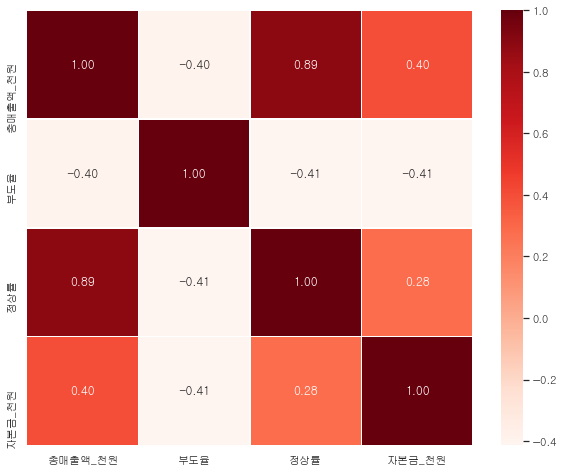

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(data = hit_20_s.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

## 히트맵 해석 관련 내용

피어슨의 상관계수는 일반적으로,

값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계

값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계

값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계

값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계

값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계

값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계

값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계

로 해석 출처: https://computer-science-student.tistory.com/305